In [52]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [53]:
!pip install mne

In [54]:
import mne

In [4]:
test = mne.io.read_raw_edf('/content/NU0001_EPOCX_191346_2023.08.16T11.49.53+09.00.edf')

Extracting EDF parameters from /content/NU0001_EPOCX_191346_2023.08.16T11.49.53+09.00.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [5]:
sub01 = test.get_data()

In [6]:
sub01.shape

(60, 155904)

In [7]:
sub01_f3 = sub01[8, :]

In [8]:
sub01_f3.shape

(155904,)

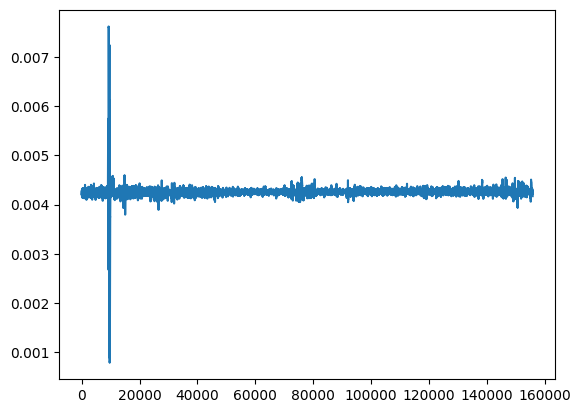

In [9]:
plt.plot(sub01_f3)

In [15]:
sub01_f3[48000:53000]

array([0.0042241 , 0.0042359 , 0.00424359, ..., 0.00423026, 0.00421538,
       0.00421846])

In [16]:
sub01_f3.shape

(155904,)

In [55]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [20]:
sr = 128
n_fft = 256
hop_length = 16
n_mels = 64
fmin = 0.5
fmax = 60

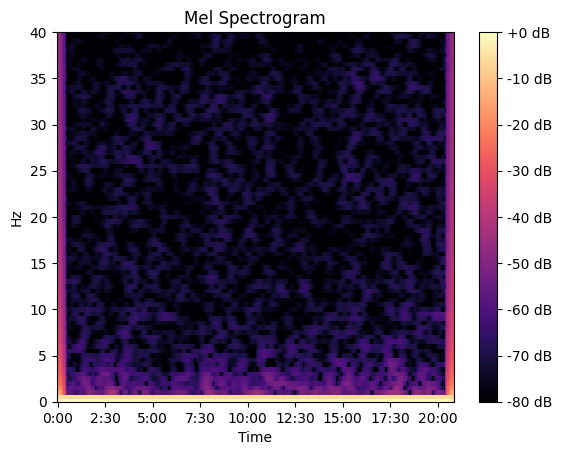

In [26]:
for i in range(1):
# Mel spectrogram 계산
    sample = sub01_f3[48000:53000]
    # mel_spectrogram = librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=fmin, fmax=fmax)
    spectrogram = np.abs(librosa.stft(y=sample, n_fft=n_fft, hop_length=hop_length))
    # log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    # Mel spectrogram 시각화
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, y_axis='linear', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.ylim(0, 40)
    plt.show()

#print(mel_spectrogram.shape)
#print(log_mel_spectrogram.shape)

# CSV

In [507]:
import pandas as pd
import numpy as np
from glob import glob
from scipy.signal import butter, filtfilt
from scipy import signal
import seaborn as sns

In [680]:
pd.read_csv('/content/NU0064_pp.csv')

,Time,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,0.000000e+00,-12.0231,9.5355,-9.7596,-10.4222,9.9867,-9.0863,4.8859,0.8581,2.6775,3.1314,-5.9861,-11.2649,-8.6307,-9.4531
1,7.812500e+00,-20.7698,8.0826,-7.8290,-6.9753,14.7979,-5.3968,1.0153,-1.7186,0.2423,0.7638,-11.6706,-14.3307,-13.5129,-26.4940
2,1.562500e+01,-16.6445,8.9869,-4.1689,-3.5549,13.7586,3.5031,-4.5751,-3.7776,2.2095,1.7489,-11.0001,-9.9669,-7.3964,-38.3758
3,2.343750e+01,-0.8689,14.9763,2.1093,-10.2847,11.9699,1.3630,-7.1288,-3.1365,5.7919,4.7668,-3.6658,-0.0966,3.6617,-16.8654
4,3.125000e+01,-2.3318,13.9146,4.7710,-19.3427,12.2901,-11.2021,-7.4054,1.6324,5.6117,4.4718,2.4680,5.5363,6.1143,11.4126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208635,1.629961e+06,-133.6010,-116.9981,-113.2303,-105.2579,-89.9322,-131.1544,-106.1055,-115.5347,-97.8806,-89.5801,-117.5935,-139.7350,-84.4470,-120.1698
208636,1.629969e+06,-158.5462,-133.7247,-120.3974,-128.4696,-112.7360,-90.3578,-103.0963,-116.5667,-98.5752,-87.9182,-123.4061,-138.7842,-84.4109,-121.1612
208637,1.629977e+06,-162.0872,-145.6944,-128.4174,-130.3768,-138.4250,-58.3783,-99.7636,-113.8684,-100.1520,-90.1774,-126.9772,-128.9906,-85.4239,-122.3148
208638,1.629984e+06,-150.6469,-129.7305,-120.9136,-116.4895,-128.0457,-88.8598,-101.7414,-109.5276,-96.9658,-89.7642,-127.9456,-125.2266,-84.6565,-113.7190


In [681]:
df = pd.DataFrame(pd.read_csv('/content/NU0064_pp.csv'))

In [682]:
df

,Time,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,0.000000e+00,-12.0231,9.5355,-9.7596,-10.4222,9.9867,-9.0863,4.8859,0.8581,2.6775,3.1314,-5.9861,-11.2649,-8.6307,-9.4531
1,7.812500e+00,-20.7698,8.0826,-7.8290,-6.9753,14.7979,-5.3968,1.0153,-1.7186,0.2423,0.7638,-11.6706,-14.3307,-13.5129,-26.4940
2,1.562500e+01,-16.6445,8.9869,-4.1689,-3.5549,13.7586,3.5031,-4.5751,-3.7776,2.2095,1.7489,-11.0001,-9.9669,-7.3964,-38.3758
3,2.343750e+01,-0.8689,14.9763,2.1093,-10.2847,11.9699,1.3630,-7.1288,-3.1365,5.7919,4.7668,-3.6658,-0.0966,3.6617,-16.8654
4,3.125000e+01,-2.3318,13.9146,4.7710,-19.3427,12.2901,-11.2021,-7.4054,1.6324,5.6117,4.4718,2.4680,5.5363,6.1143,11.4126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208635,1.629961e+06,-133.6010,-116.9981,-113.2303,-105.2579,-89.9322,-131.1544,-106.1055,-115.5347,-97.8806,-89.5801,-117.5935,-139.7350,-84.4470,-120.1698
208636,1.629969e+06,-158.5462,-133.7247,-120.3974,-128.4696,-112.7360,-90.3578,-103.0963,-116.5667,-98.5752,-87.9182,-123.4061,-138.7842,-84.4109,-121.1612
208637,1.629977e+06,-162.0872,-145.6944,-128.4174,-130.3768,-138.4250,-58.3783,-99.7636,-113.8684,-100.1520,-90.1774,-126.9772,-128.9906,-85.4239,-122.3148
208638,1.629984e+06,-150.6469,-129.7305,-120.9136,-116.4895,-128.0457,-88.8598,-101.7414,-109.5276,-96.9658,-89.7642,-127.9456,-125.2266,-84.6565,-113.7190


In [683]:
df.columns

Index(['Time', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8',
       'FC6', 'F4', 'F8', 'AF4'],
      dtype='object')

In [684]:
df = df.drop(['Time'], axis = 1)

In [685]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,-12.0231,9.5355,-9.7596,-10.4222,9.9867,-9.0863,4.8859,0.8581,2.6775,3.1314,-5.9861,-11.2649,-8.6307,-9.4531
1,-20.7698,8.0826,-7.8290,-6.9753,14.7979,-5.3968,1.0153,-1.7186,0.2423,0.7638,-11.6706,-14.3307,-13.5129,-26.4940
2,-16.6445,8.9869,-4.1689,-3.5549,13.7586,3.5031,-4.5751,-3.7776,2.2095,1.7489,-11.0001,-9.9669,-7.3964,-38.3758
3,-0.8689,14.9763,2.1093,-10.2847,11.9699,1.3630,-7.1288,-3.1365,5.7919,4.7668,-3.6658,-0.0966,3.6617,-16.8654
4,-2.3318,13.9146,4.7710,-19.3427,12.2901,-11.2021,-7.4054,1.6324,5.6117,4.4718,2.4680,5.5363,6.1143,11.4126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208635,-133.6010,-116.9981,-113.2303,-105.2579,-89.9322,-131.1544,-106.1055,-115.5347,-97.8806,-89.5801,-117.5935,-139.7350,-84.4470,-120.1698
208636,-158.5462,-133.7247,-120.3974,-128.4696,-112.7360,-90.3578,-103.0963,-116.5667,-98.5752,-87.9182,-123.4061,-138.7842,-84.4109,-121.1612
208637,-162.0872,-145.6944,-128.4174,-130.3768,-138.4250,-58.3783,-99.7636,-113.8684,-100.1520,-90.1774,-126.9772,-128.9906,-85.4239,-122.3148
208638,-150.6469,-129.7305,-120.9136,-116.4895,-128.0457,-88.8598,-101.7414,-109.5276,-96.9658,-89.7642,-127.9456,-125.2266,-84.6565,-113.7190


In [686]:
df.shape

(208640, 14)

In [687]:
df2 = df.T

In [688]:
df2.shape

(14, 208640)

In [689]:
df2

,0,1,2,3,4,5,6,7,8,9,...,208630,208631,208632,208633,208634,208635,208636,208637,208638,208639
AF3,-12.0231,-20.7698,-16.6445,-0.8689,-2.3318,-17.8173,-16.9127,-6.3386,-14.0857,-29.3056,...,-156.5421,-171.5148,-184.2316,-163.4689,-131.1588,-133.6010,-158.5462,-162.0872,-150.6469,-153.7762
F7,9.5355,8.0826,8.9869,14.9763,13.9146,5.0536,3.0305,7.0067,4.1461,-1.8870,...,-122.7763,-127.3267,-139.0340,-143.3750,-127.4845,-116.9981,-133.7247,-145.6944,-129.7305,-115.8135
F3,-9.7596,-7.8290,-4.1689,2.1093,4.7710,1.9253,-0.5178,-2.5639,-7.3251,-9.4993,...,-123.6934,-116.4909,-125.0887,-133.6290,-124.2292,-113.2303,-120.3974,-128.4174,-120.9136,-114.1510
FC5,-10.4222,-6.9753,-3.5549,-10.2847,-19.3427,-20.8861,-21.0642,-21.3708,-17.3603,-17.1747,...,-123.9070,-124.2719,-126.1994,-116.0789,-99.0753,-105.2579,-128.4696,-130.3768,-116.4895,-119.4891
T7,9.9867,14.7979,13.7586,11.9699,12.2901,7.6971,-0.7487,-2.6113,1.8911,2.8075,...,-111.1765,-110.7522,-117.0650,-122.2451,-104.3315,-89.9322,-112.7360,-138.4250,-128.0457,-107.6508
P7,-9.0863,-5.3968,3.5031,1.3630,-11.2021,-15.5567,-11.7418,-12.3245,-14.5249,-13.0306,...,-97.4701,-109.3228,-85.4498,-74.9226,-111.9446,-131.1544,-90.3578,-58.3783,-88.8598,-131.5525
O1,4.8859,1.0153,-4.5751,-7.1288,-7.4054,-7.9289,-8.9705,-10.0846,-10.8609,-11.1953,...,-102.7054,-105.8296,-103.3131,-101.2057,-104.1325,-106.1055,-103.0963,-99.7636,-101.7414,-107.9216
O2,0.8581,-1.7186,-3.7776,-3.1365,1.6324,7.1848,6.1565,-0.6887,-3.9840,-2.1655,...,-110.9235,-121.2727,-119.9036,-113.8788,-113.1146,-115.5347,-116.5667,-113.8684,-109.5276,-109.9296
P8,2.6775,0.2423,2.2095,5.7919,5.6117,4.9927,6.8904,6.9521,3.9603,2.1749,...,-92.7793,-95.7449,-94.9912,-95.4398,-97.7276,-97.8806,-98.5752,-100.1520,-96.9658,-91.7805
T8,3.1314,0.7638,1.7489,4.7668,4.4718,4.0687,6.4201,6.2300,2.6358,1.0646,...,-81.0833,-85.2548,-87.6379,-90.8015,-92.6757,-89.5801,-87.9182,-90.1774,-89.7642,-87.7601


In [690]:
sub08_f3 = df2.iloc[2, :]

In [691]:
sub08_f3

0          -9.7596
1          -7.8290
2          -4.1689
3           2.1093
4           4.7710
            ...   
208635   -113.2303
208636   -120.3974
208637   -128.4174
208638   -120.9136
208639   -114.1510
Name: F3, Length: 208640, dtype: float64

In [692]:
sub08_f3.shape

(208640,)

In [693]:
sub08_f3_1 = sub08_f3.values

In [694]:
sub08_f3_1

array([  -9.7596,   -7.829 ,   -4.1689, ..., -128.4174, -120.9136,
       -114.151 ])

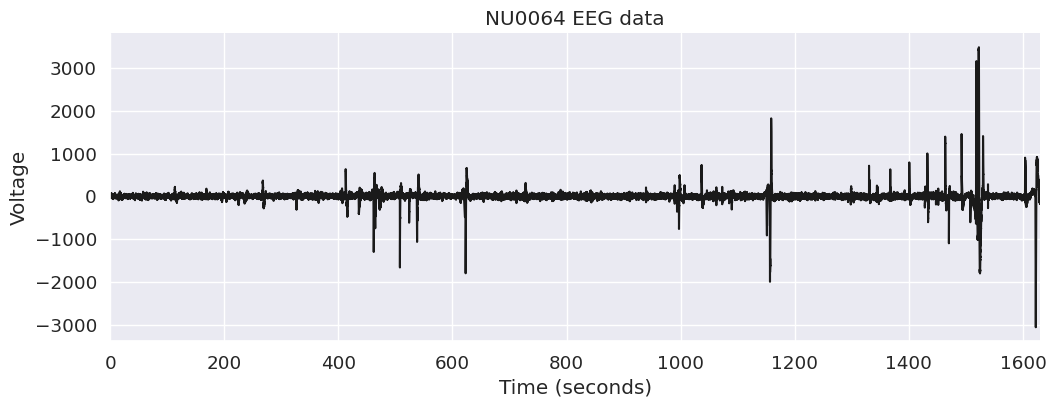

In [697]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 128.
time = np.arange(sub08_f3_1.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, sub08_f3, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('NU0064 EEG data')
sns.despine()

In [699]:
sr = 128
n_fft = 762
hop_length = 16
#n_mels = 64
#fmin = 0.5
#fmax = 44

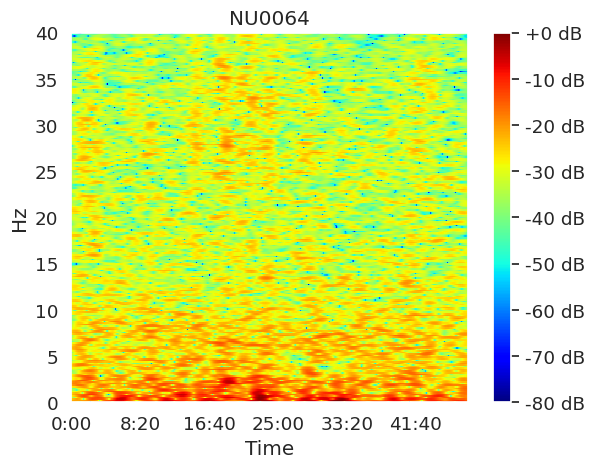

In [700]:
 for i in range(1):
# Mel spectrogram 계산
    sample = sub08_f3_1[102400:113920]
    # mel_spectrogram = librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=fmin, fmax=fmax)
    spectrogram = np.abs(librosa.stft(y=sample, n_fft=n_fft, hop_length=hop_length))
    # log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    # Mel spectrogram 시각화
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, y_axis='linear', x_axis='time', cmap='jet')
    plt.colorbar(format='%+2.0f dB')
    plt.title('NU0064')
    plt.ylim(0, 40)
    plt.show()


#print(mel_spectrogram.shape)
#print(log_mel_spectrogram.shape)

# SET file

In [99]:
test = mne.io.read_raw_eeglab('/sub-005_task-eyesclosed_eeg.set')

<ipython-input-99-153b52b157c5>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  test = mne.io.read_raw_eeglab('/sub-005_task-eyesclosed_eeg.set')


In [100]:
sub79 = test.get_data()

In [101]:
sub79.shape

(19, 402050)

In [102]:
sub79_chan = sub79[3, :]

In [103]:
sr = 500
n_fft = 2048
hop_length = 32
n_mels = 64
fmin = 0.5
fmax = 44

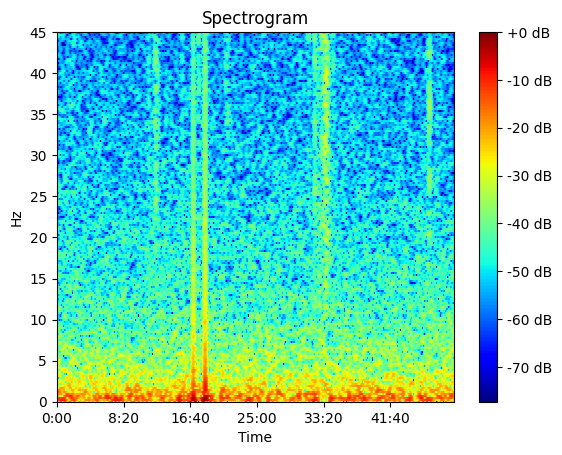

In [116]:
for i in range(1):
# Mel spectrogram 계산
    sample = sub79_chan[27000:120000]
    # mel_spectrogram = librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=fmin, fmax=fmax)
    spectrogram = np.abs(librosa.stft(y=sample, n_fft=n_fft, hop_length=hop_length))
    # log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    # Mel spectrogram 시각화
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, y_axis='linear', x_axis='time', cmap='jet')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.ylim(0, 45)
    plt.show()

#print(mel_spectrogram.shape)
#print(log_mel_spectrogram.shape)